<center><h1><u>Project 1</u></h1></center>
<left><h2>Regression Analysis</h2></left>

## Tuberculosis Burden by Country(WHO)
The number of cases of tuberculosis (all forms) in a population at a given point in time (the middle of the calendar year), expressed as the rate per 100 000 population. It is sometimes referred to as "point prevalence". Estimates include cases of TB in people with HIV. Published values are rounded to three significant figures. Uncertainty bounds are provided in addition to best estimates. See Annex 1 of the WHO global tuberculosis control report. The World Health Organization estimates the prevalence and mortality of Tuberculosis by country.
This dataset includes WHO-generated estimates of TB prevalance and mortality and case detection rate for all forms.

### Features and Rows Details:
It includes 47 Columns and 5120 rows which has 20 features for prediction. These features were segregated into multiple categories such as Economical factors and Social factors, Mortality factors, Immunization related 
factors.

### Source of the Dataset
https://public.tableau.com/s/sites/default/files/media/TB_Burden_Country.csv

<h3>Columns</h3>

1. Country:
2. ISO 2-character country/territory code:
3. ISO 3-character country/territory code:
4. ISO numeric country/territory code:
5. Region:
6. Year:
7. Estimated total population number:
8. Estimated prevalence of TB (all forms) per 100 000 population:
9. Estimated prevalence of TB (all forms) per 100 000 population, low bound:
10. Estimated prevalence of TB (all forms) per 100 000 population, high bound:
11. Estimated prevalence of TB (all forms):
12. Estimated prevalence of TB (all forms), low bound:
13. Estimated prevalence of TB (all forms), high bound:
14. Method to derive prevalence estimates:
15. Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population:
16. Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound:
17. Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound:
18. Estimated number of deaths from TB (all forms, excluding HIV):
19. Estimated number of deaths from TB (all forms, excluding HIV), low bound:
20. Estimated number of deaths from TB (all forms, excluding HIV), high bound:
21. Estimated mortality of TB cases who are HIV-positive, per 100 000 population:
22. Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound:
23. Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound:
24. Estimated number of deaths from TB in people who are HIV-positive:
25. Estimated number of deaths from TB in people who are HIV-positive, low bound:
26. Estimated number of deaths from TB in people who are HIV-positive, high bound:
27. Method to derive mortality estimates:
28. Estimated incidence (all forms) per 100 000 population:
29. Estimated incidence (all forms) per 100 000 population, low bound:
30. Estimated incidence (all forms) per 100 000 population, high bound:
31. Estimated number of incident cases (all forms):
32. Estimated number of incident cases (all forms), low bound:
33. Estimated number of incident cases (all forms), high bound:
34. Method to derive incidence estimates:
35. Estimated HIV in incident TB (percent):
36. Estimated HIV in incident TB (percent), low bound:
37. Estimated HIV in incident TB (percent), high bound:
38. Estimated incidence of TB cases who are HIV-positive per 100 000 population:
39. Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound:
40. Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound:
41. Estimated incidence of TB cases who are HIV-positive:
42. Estimated incidence of TB cases who are HIV-positive, low bound:
43. Estimated incidence of TB cases who are HIV-positive, high bound:
44. Method to derive TBHIV estimates:
45. Case detection rate (all forms), percent:
46. Case detection rate (all forms), percent, low bound:
47. Case detection rate (all forms), percent, high bound:




<h2>Pre-Process Data</h2>
<center><h2> Import Libraries and Setups </h2></center></p>

In [0]:
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

<center><h2>Get the data </h2></center></p>

In [0]:
data=pd.read_excel('TB_Burden_Country.xlsx')


<center><h2> Dropping the Irrelevant Columns </h2></center></p>

In [0]:
data=data.drop(columns=['ISO 2-character country/territory code','ISO 3-character country/territory code','Year', 'Method to derive TBHIV estimates' ])

<center><h2> Imputing the missing value</h2></center></p>

In [0]:
data['Method to derive incidence estimates']=data['Method to derive incidence estimates'].fillna('Not applicable')

<center><h2> filling the "NaN" values using mean</h2></center></p>

In [0]:
from collections import defaultdict
averages=defaultdict(int)
for i in data.columns:

  count=0
  avg=0
  if data[i].dtype=='float64':
      avg = data[i].fillna(0).sum()/len(data[i])
      data[i] = data[i].fillna(avg)
     

In [7]:
data

,Country or territory name,ISO numeric country/territory code,Region,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound",Method to derive prevalence estimates,"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound",Estimated number of deaths from TB in people who are HIV-positive,"Estimated number of deaths from TB in people who are HIV-positive, low bound","Estimated number of deaths from TB in people who are HIV-positive, high bound",Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Method to derive incidence estimates,Estimated HIV in incident TB (percent),"Estimated HIV in incident TB (percent), low bound","Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,4,EMR,11731193,306.0,156.0,506.0,36000.0,18000.0,59000.0,predicted,37.0,24.0,54.0,4300.0,2800.0,6400.0,0.04,0.03,0.05,5.0,4.1,6.0,Indirect,189.0,157.0,238.0,22000.0,18000.0,28000.0,Not applicable,0.06,0.04,0.08,0.11,0.08,0.14,12.0,9.4,16.0,20.000000,15.000000,24.000000
1,Afghanistan,4,EMR,12612043,343.0,178.0,562.0,43000.0,22000.0,71000.0,predicted,46.0,29.0,61.0,5800.0,3700.0,7700.0,0.06,0.05,0.08,8.0,6.2,10.0,Indirect,191.0,167.0,227.0,24000.0,21000.0,29000.0,Not applicable,0.07,0.06,0.09,0.13,0.11,0.16,17.0,14.0,20.0,96.000000,80.000000,110.000000
2,Afghanistan,4,EMR,13811876,371.0,189.0,614.0,51000.0,26000.0,85000.0,predicted,54.0,34.0,68.0,7400.0,4700.0,9400.0,0.08,0.06,0.10,11.0,8.3,14.0,Indirect,191.0,171.0,217.0,26000.0,24000.0,30000.0,Not applicable,0.08,0.07,0.10,0.16,0.14,0.18,22.0,19.0,24.0,62.235465,56.525859,69.202408
3,Afghanistan,4,EMR,15175325,392.0,194.0,657.0,59000.0,30000.0,100000.0,predicted,60.0,38.0,73.0,9100.0,5800.0,11000.0,0.11,0.09,0.14,17.0,13.0,21.0,Indirect,189.0,171.0,209.0,29000.0,26000.0,32000.0,Not applicable,0.10,0.09,0.11,0.19,0.17,0.21,28.0,25.0,31.0,62.235465,56.525859,69.202408
4,Afghanistan,4,EMR,16485018,410.0,198.0,697.0,68000.0,33000.0,110000.0,predicted,65.0,41.0,79.0,11000.0,6800.0,13000.0,0.13,0.11,0.16,22.0,17.0,27.0,Indirect,188.0,169.0,208.0,31000.0,28000.0,34000.0,Not a

<center><h2> Exploratory Data Analysis </h2></center></p>

In [8]:
high_TB = data.groupby('Country or territory name').mean().nlargest(10,'Estimated incidence of TB cases who are HIV-positive').reset_index()
high_TB

,Country or territory name,ISO numeric country/territory code,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound",Estimated number of deaths from TB in people who are HIV-positive,"Estimated number of deaths from TB in people who are HIV-positive, low bound","Estimated number of deaths from TB in people who are HIV-positive, high bound",Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Estimated HIV in incident TB (percent),"Estimated HIV in incident TB (percent), low bound","Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,South Africa,710.0,4.562754e+07,612.416667,338.166667,966.541667,2.862500e+05,1.585417e+05,4.500000e+05,50.000000,32.500000,66.666667,23041.666667,15012.500000,30708.333333,103.010417,79.907917,129.175000,50011.666667,38812.083333,62325.416667,650.000000,597.208333,706.541667,3.083333e+05,2.848750e+05,3.350000e+05,42.631667,37.437500,47.620833,336.383333,309.037500,368.883333,164800.000000,151054.166667,180816.666667,67.916667,61.750000,74.416667
1,India,356.0,1.065147e+09,386.541667,323.375000,456.916667,4.020833e+06,3.337500e+06,4.791667e+06,34.583333,22.625000,48.791667,362083.333333,238333.333333,512083.333333,3.342083,2.818750,3.913333,37357.083333,31502.083333,43402.916667,206.333333,196.625000,217.125000,2.183333e+06,2.079167e+06,2.291667e+06,4.195000,3.652083,4.775417,8.445000,7.303333,9.583750,95666.666667,81679.166667,106845.833333,56.416667,53.541667,59.458333
2,Nigeria,566.0,1.301310e+08,330.500000,253.666667,417.166667,4.304167e+05,3.300000e+05,5.429167e+05,98.875000,61.458333,135.375000,127625.000000,78750.000000,176250.000000,42.291667,28.250000,59.083333,57904.166667,38525.000000,80875.000000,316.125000,224.500000,416.125000,4.170833e+05,2.958333e+05,5.479167e+05,19.412500,11.537500,28.954167,61.958333,43.170833,85.625000,86041.666667,59741.666667,118875.000000,10.129167,7.733333,14.408333
3,Zimbabwe,716.0,1.234234e+07,407.541667,223.333333,646.375000,5.066667e+04,2.783333e+04,8.016667e+04,33.416667,21.625000,43.833333,4133.333333,

<center><h2> Visualizing the Data for displaying top 10 countries with maximum TB cases  </h2></center></p>

In [0]:
high_TB.rename(columns = {'Country or territory name':'Country'}, inplace = True)

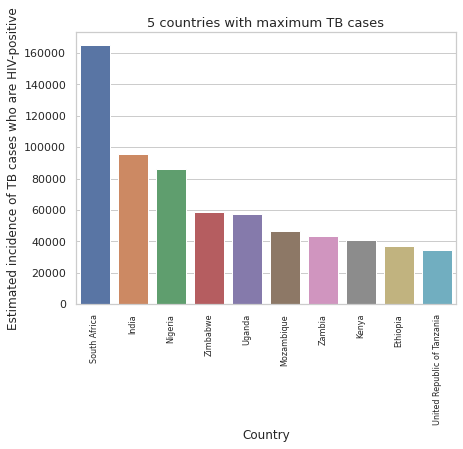

In [10]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid', palette='deep')

plt.subplot(1,2,1)
plot1 = sns.barplot(data = high_TB, x = high_TB.Country, y = high_TB['Estimated incidence of TB cases who are HIV-positive'])
plot1.set_title("5 countries with maximum TB cases", fontsize = 13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 90, ha = "center", fontsize = 8)
plt.show()

<center><h2> Dropping the Country from Dataset </h2></center></p>

In [0]:
data=data.drop(columns=['Country or territory name'])

<center><h2> Using Label Encoder for Object </h2></center></p>

In [0]:
for i in data.columns:
    if data[i].dtype=='object':
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

<center><h2> Plotting the heatmap for Correlation </h2></center></p>

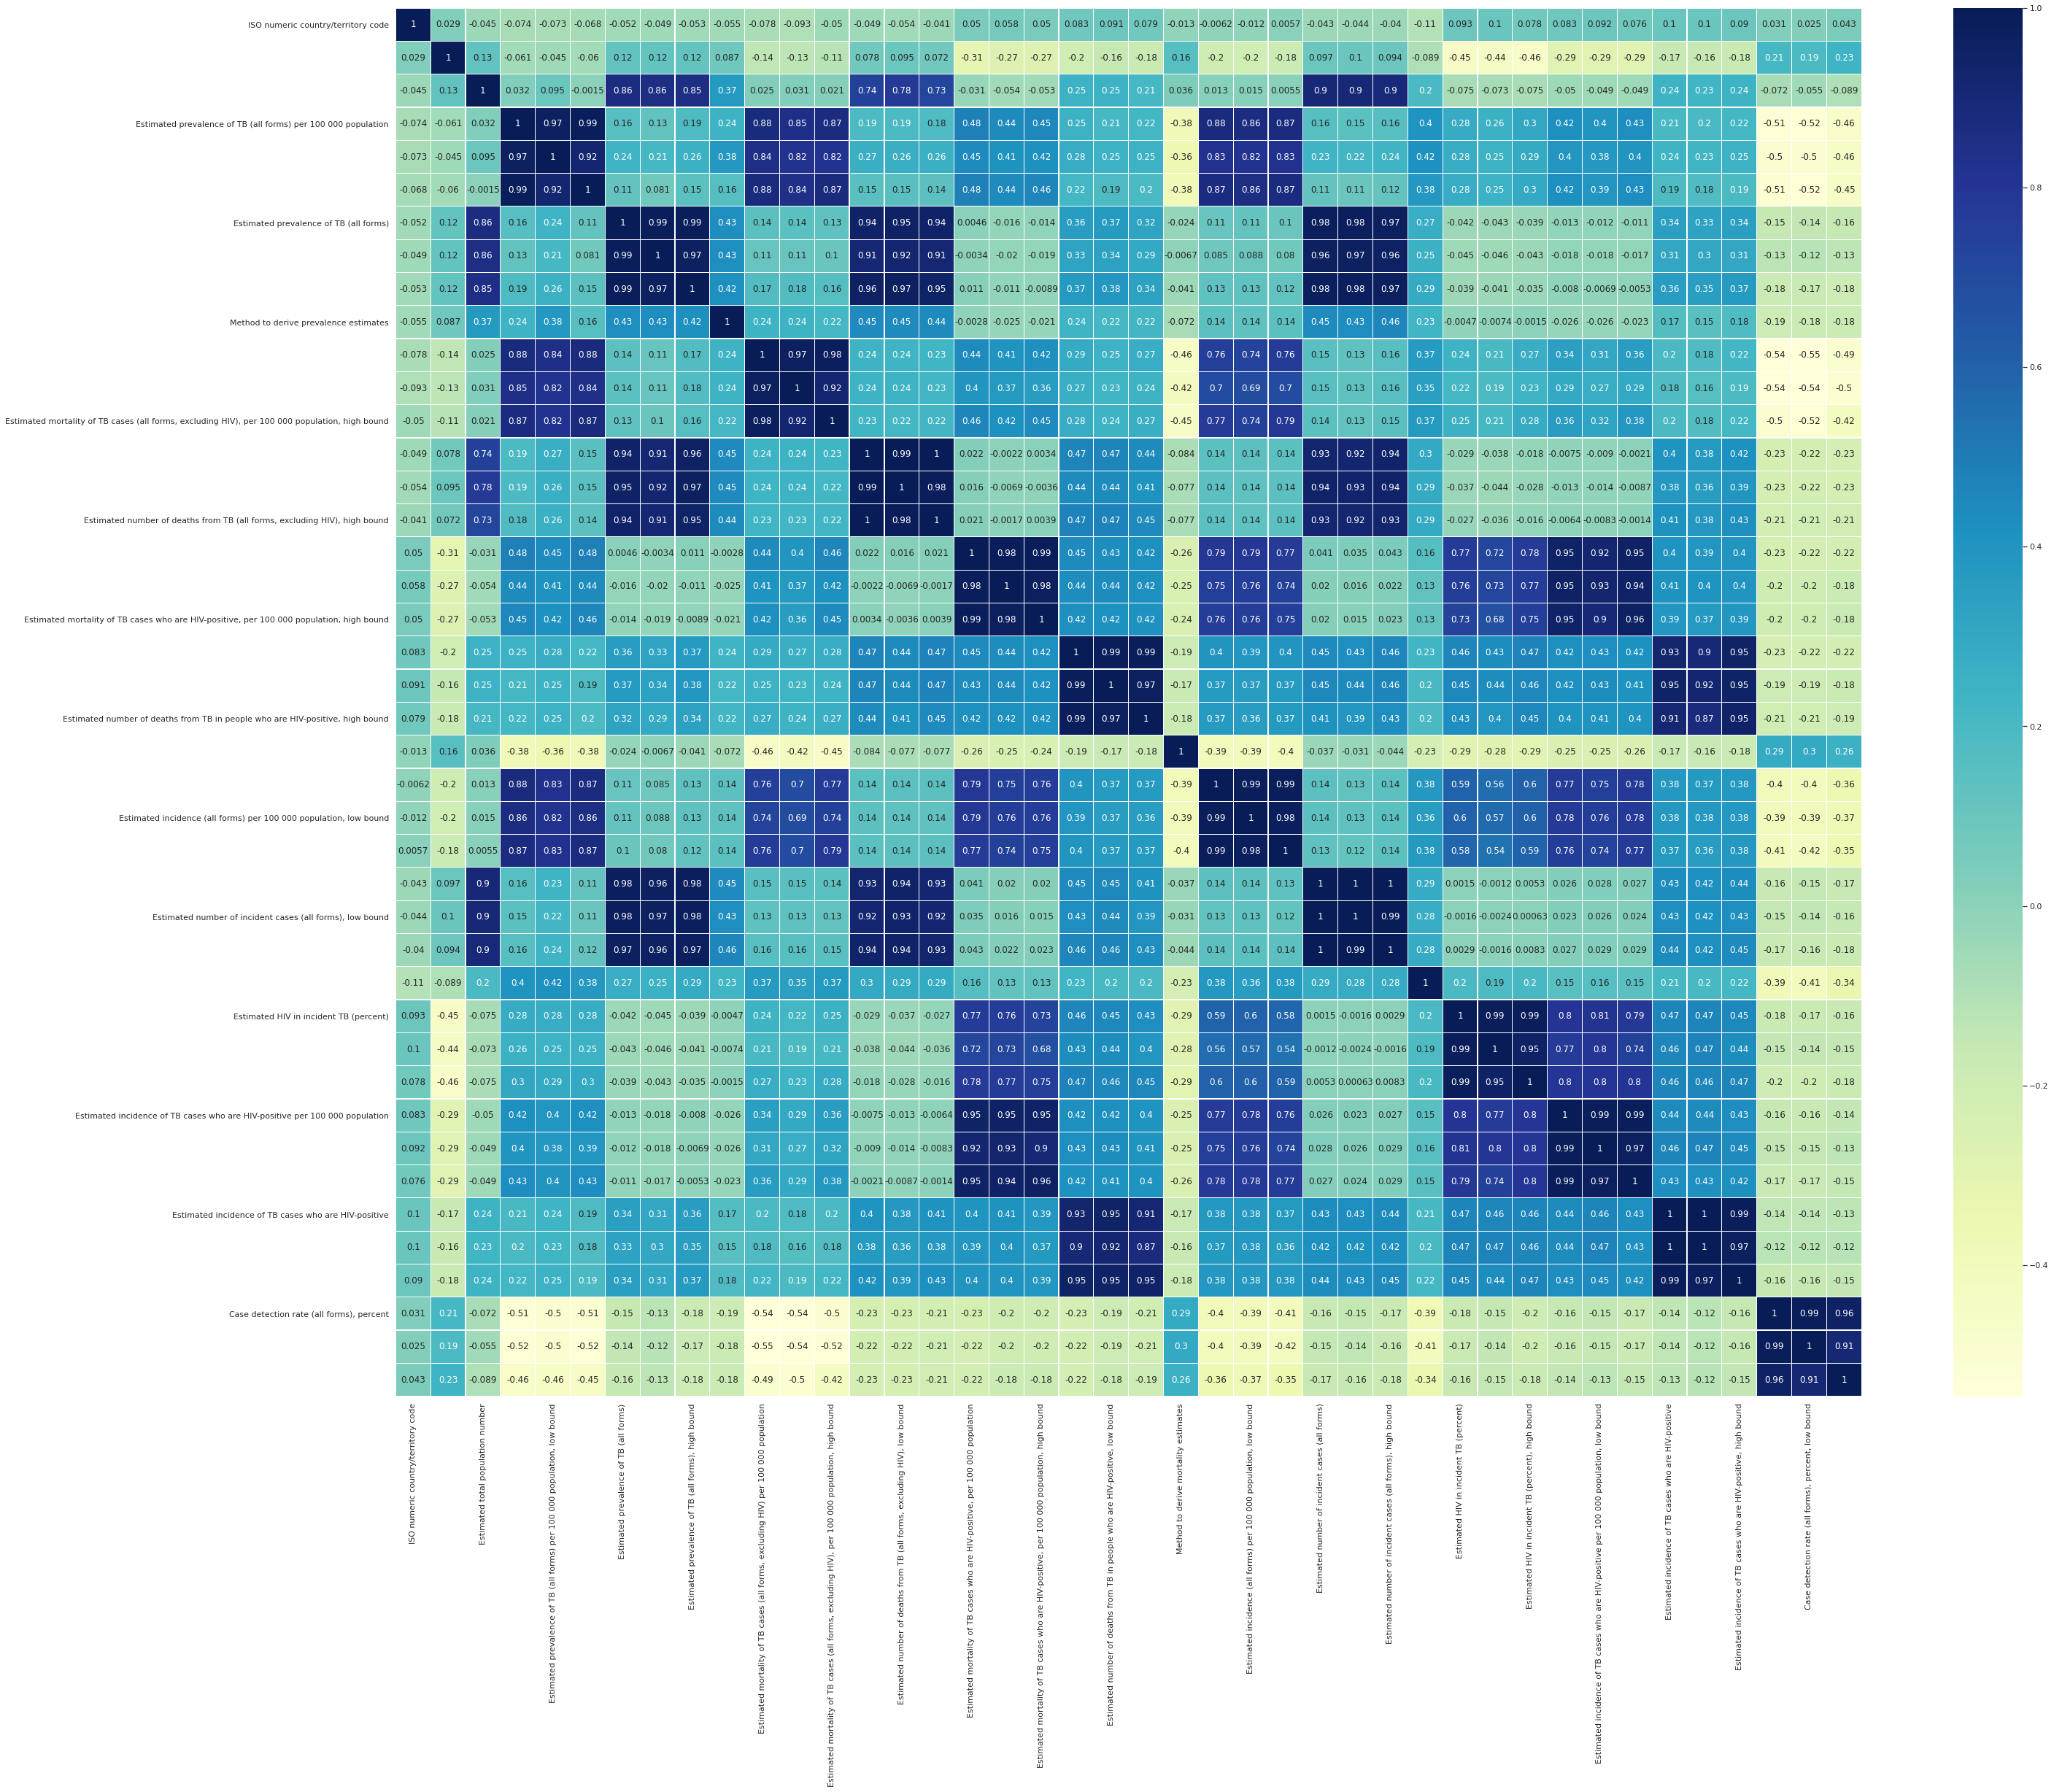

In [13]:
#Heat map for correlation
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(45,35)
plt.show()

<center><h2> Defining target variable </h2></center></p>

In [0]:
y=data["Estimated number of deaths from TB (all forms, excluding HIV)"].values
X=data.drop(columns="Estimated number of deaths from TB (all forms, excluding HIV)").values

In [15]:
data.tail()

,ISO numeric country/territory code,Region,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound",Method to derive prevalence estimates,"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound",Estimated number of deaths from TB in people who are HIV-positive,"Estimated number of deaths from TB in people who are HIV-positive, low bound","Estimated number of deaths from TB in people who are HIV-positive, high bound",Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Method to derive incidence estimates,Estimated HIV in incident TB (percent),"Estimated HIV in incident TB (percent), low bound","Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
5115,716,0,12888918,449.0,258.0,692.0,58000.0,33000.0,89000.0,2,39.0,27.0,52.0,5000.0,3500.0,6700.0,206.0,169.0,246.0,27000.0,22000.0,32000.0,0,673.0,620.0,740.0,87000.0,80000.0,95000.0,5,76.0,65.0,85.0,511.0,460.0,566.0,66000.0,59000.0,73000.0,50.0,45.0,54.0
5116,716,0,13076978,415.0,239.0,639.0,54000.0,31000.0,84000.0,2,36.0,25.0,48.0,4700.0,3300.0,6300.0,196.0,161.0,236.0,26000.0,21000.0,31000.0,0,635.0,576.0,708.0,83000.0,75000.0,93000.0,5,77.0,64.0,88.0,487.0,433.0,545.0,64000.0,57000.0,71000.0,53.0,48.0,59.0
5117,716,0,13358738,417.0,241.0,639.0,56000.0,32000.0,85000.0,2,38.0,26.0,51.0,5100.0,3500.0,6800.0,176.0,144.0,211.0,24000.0,19000.0,28000.0,0,602.0,543.0,674.0,80000.0,72000.0,90000.0,5,75.0,63.0,85.0,448.0,403.0,502.0,60000.0,54000.0,67000.0,48.0,43.0,53.0
5118,716,0,13724317,425.0,245.0,654.0,58000.0,34000.0,90000.0,2,41.0,27.0,55.0,5600.0,3700.0,7500.0,160.0,130.0,194.0,22000.0,18000.0,27000.0,0,575.0,504.0,656.0,79000.0,69000.0,90000.0,5,72.0,58.0,84.0,411.0,362.0,471.0,56000.0,50000.0,65000.0,45.0,40.0,52.0
5119,716,0,14149648,409.0,235.0,630.0,58000.0,33000.0,89000.0,2,40.0,25.0,52.0,5700.0,3600.0,7400.0,153.0,121.0,189.0,22000.0,17000.0,27000.0,0,552.0,474.0,643.0,78000.0,67000.0,91000.0,5,72.0,55.0,86.0,395.0,341.0,464.0,56000.0,48000.0,66000.0,42.0,36.0,49.0


<center><h2> Splitting the dataset </h2></center></p>

In [0]:
from sklearn.model_selection import train_test_split,cross_val_score 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

<center><h2> Feature Standardization</h2></center></p>

<center><h3> We have used StandardScaler for the purpose of scaling where distribution is centered around 0 with a standard deviation of 1</h3></center></p>

In [0]:
sc=StandardScaler()

In [0]:
# scaler=sc.fit(xTrain)
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Modeling- Selecting, triaining and optimizing 


# SVM   ( SVM models include LINEAR, RBF and POLY KERNELS)

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('SVM: Best Parameters',model.best_params_)
print()
print("Development set grid scores:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))
print()


# Tuning hyper-parameters

Development set: Best Parameters

SVM: Best Parameters {'C': 100, 'kernel': 'linear'}

Development set grid scores:

-0.050 (+/-0.017) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}
-0.049 (+/-0.017) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}
-0.046 (+/-0.015) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.047 (+/-0.016) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
-0.050 (+/-0.017) for {'C': 1,

# SVM(LinearSVR)


defaultdict(<class 'int'>, {1: 0.219821294645261, 10: 0.8912728050798503, 100: 0.9992048727485731, 1000: 0.9995680696921091, 10000: 0.9994386114916549, 100000: 0.9993932239098765, 1000000: 0.9989521884788014})
R square score is: 0.9995680696921091



Text(0.5, 0, '$\\alpha$')

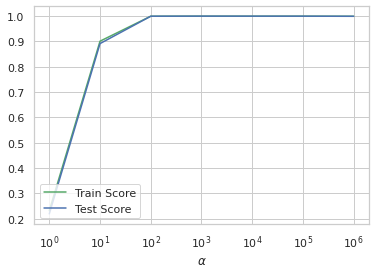

In [20]:
from sklearn.svm import LinearSVR
from collections import defaultdict
d=defaultdict(int)
train_score_list = []
test_score_list = []
C= [1,10,100,1000,10000,100000,1000000]

for i in C: 
    clf = LinearSVR(C=i)
    clf.fit(X_train,y_train)
    train_score_list.append(clf.score(X_train,y_train))
    test_score_list.append(clf.score(X_test, y_test))
#print(test_score_list)
for i in range(len(C)):
  d[C[i]]=test_score_list[i]
print(d)

print('R square score is:', max(d.values()))
print()
    
import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# KNN Regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
tuned_parameters = [{'n_neighbors':[2,3,4,5,6,7,8,9]}]


print("# Tuning hyper-parameters #")
print()

model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5,return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('KNN regressor: Best Parameters',model.best_params_)
print()
print("Development set grid scores:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))




# Tuning hyper-parameters #

Development set: Best Parameters

KNN regressor: Best Parameters {'n_neighbors': 2}

Development set grid scores:

0.995 (+/-0.005) for {'n_neighbors': 2}
0.994 (+/-0.004) for {'n_neighbors': 3}
0.990 (+/-0.006) for {'n_neighbors': 4}
0.987 (+/-0.009) for {'n_neighbors': 5}
0.984 (+/-0.012) for {'n_neighbors': 6}
0.980 (+/-0.014) for {'n_neighbors': 7}
0.977 (+/-0.013) for {'n_neighbors': 8}
0.973 (+/-0.013) for {'n_neighbors': 9}

R square score is: 0.9980467181714553


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
tuned_parameters = [{'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(LinearRegression(), tuned_parameters, cv=7, return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('Linear Regression: Best Parameters',model.best_params_)
print()
print("Development set grid scores:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))
print()


# Tuning hyper parameters #

Development set: Best Parameters

Linear Regression: Best Parameters {'copy_X': True, 'fit_intercept': True, 'normalize': True}

Development set grid scores:

1.000 (+/-0.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
1.000 (+/-0.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.926 (+/-0.088) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.926 (+/-0.088) for {'copy_X': True, 'fit_intercept': False, 'normalize': False}
1.000 (+/-0.000) for {'copy_X': False, 'fit_intercept': True, 'normalize': True}
1.000 (+/-0.000) for {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.926 (+/-0.088) for {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.926 (+/-0.088) for {'copy_X': False, 'fit_intercept': False, 'normalize': False}

R square score is: 0.9995018601843841



# Ridge Regression

In [23]:
from  sklearn.linear_model import Ridge
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Ridge(), tuned_parameters, cv=5, return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('Ridge Regression:Best Parameters',model.best_params_)
print()
print("Development set grid scores:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))
print()



# Tuning hyper parameters #

Development set: Best Parameters

Ridge Regression:Best Parameters {'alpha': 1}

Development set grid scores:

1.000 (+/-0.000) for {'alpha': 0.01}
1.000 (+/-0.000) for {'alpha': 0.1}
1.000 (+/-0.000) for {'alpha': 1}
0.999 (+/-0.000) for {'alpha': 10}
0.996 (+/-0.003) for {'alpha': 100}

R square score is: 0.9995356815549072



# Polynomial Regression

In [24]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression

scores={}
for n in range(2,4,1):
  poly=PolynomialFeatures(n)
  model=LinearRegression()
  X_train_poly=poly.fit_transform(X_train)
  X_test_poly=poly.transform(X_test)
  model.fit(X_train_poly,y_train)
  scores[n]=model.score(X_test_poly,y_test)
  
print(scores)

{2: 0.9793636768420991, 3: -423.75536003957205}


# Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Lasso(), tuned_parameters, cv=5, return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('Lasso Regression: Best Parameters',model.best_params_)
print()
print("Development set grid scores:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))
print()



# Tuning hyper parameters #

Development set: Best Parameters

Lasso Regression: Best Parameters {'alpha': 1}

Development set grid scores:

1.000 (+/-0.000) for {'alpha': 0.01}
1.000 (+/-0.000) for {'alpha': 0.1}
1.000 (+/-0.000) for {'alpha': 1}
0.999 (+/-0.000) for {'alpha': 10}
0.999 (+/-0.001) for {'alpha': 100}

R square score is: 0.999544893306647



# Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

tuned_parameters = [{'max_depth':[12,13,14,15,16,17]}] 


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(DecisionTreeRegressor(criterion='mse'), tuned_parameters, cv=5,return_train_score=True)
model.fit(X_train, y_train)

print("Development set: Best Parameters")
print()
print('Decision Tree Regressor: Best Parameters',model.best_params_)
print()
print("Development set grid score:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()


y_pred = model.predict(X_test)
print('R square score is:',model.score(X_test,y_test))
print()



# Tuning hyper parameters #

Development set: Best Parameters

Decision Tree Regressor: Best Parameters {'max_depth': 14}

Development set grid score:

0.995 (+/-0.003) for {'max_depth': 12}
0.994 (+/-0.006) for {'max_depth': 13}
0.996 (+/-0.002) for {'max_depth': 14}
0.995 (+/-0.004) for {'max_depth': 15}
0.996 (+/-0.002) for {'max_depth': 16}
0.989 (+/-0.024) for {'max_depth': 17}

R square score is: 0.996561819946291



# SVM and Lasso Regression are considered as the best model on the basis of R2 score

<left><h1>Classification Analysis</h1></left>

<left><h2>American University Data</h2></left>
 
Most American institutions (that are not necessarily the top 10-20) that provide undergraduate education face a challenge i.e. what kind of students they will make an offer for admission so that they can maintain a good performance in terms of number of students completing their courses in time. They also need to predict how the current batch of intake will perform. The universities cannot relax the entry criteria too much as that way the quality of education that they provide gets diluted. At the other hand, they have to make offers to the candidates who are not only having appropriate profile but are also most likely to accept the offers.
On the other side, the students have a challenge deciding which colleges they should apply i.e. the colleges that provide best performance at a minimal cost given their own profiles. The student profile is determined by not only the performance in examination such as SAT and ACT, but also other data points such as their ethnicity, immigration status, gender etc.
This dataset tells us about the  course, enrollment, SAT scores, estimated tuition and  the graduation rate of the major universities in the United States.

### Features and Rows Details:
The initial dataset consists of 145 Columns and 1534 rows. All predicting variables was then divided into several broad categories: Enrollment rates, required SAT scores, estimated tuition fees and the graduation rates.

### Source of the Dataset
https://public.tableau.com/s/sites/default/files/media/Resources/IPEDS_data.xlsx

<h3>Columns</h3>

1. ID number
2. Name
3. year
4. ZIP code
5. Highest degree offered
6. County name
7. Longitude location of institution
8. Latitude location of institution
9. Religious affiliation
10. Offers Less than one year certificate
11. Offers One but less than two years certificate
12. Offers Associate's degree
13. Offers Two but less than 4 years certificate
14. Offers Bachelor's degree
15. Offers Postbaccalaureate certificate
16. Offers Master's degree
17. Offers Post-master's certificate
18. Offers Doctor's degree - research/scholarship
19. Offers Doctor's degree - professional practice
20. Offers Doctor's degree - other
21. Offers Other degree
22. Applicants total
23. Admissions total
24. Enrolled total
25. Percent of freshmen submitting SAT scores
26. Percent of freshmen submitting ACT scores
27. SAT Critical Reading 25th percentile score
28. SAT Critical Reading 75th percentile score
29. SAT Math 25th percentile score
30. SAT Math 75th percentile score
31. SAT Writing 25th percentile score
32. SAT Writing 75th percentile score
33. ACT Composite 25th percentile score
34. ACT Composite 75th percentile score
35. Estimated enrollment, total
36. Estimated enrollment, full time
37. Estimated enrollment, part time
38. Estimated undergraduate enrollment, total
39. Estimated undergraduate enrollment, full time
40. Estimated undergraduate enrollment, part time
41. Estimated freshman undergraduate enrollment, total
42. Estimated freshman enrollment, full time
43. Estimated freshman enrollment, part time
44. Estimated graduate enrollment, total
45. Estimated graduate enrollment, full time
46. Estimated graduate enrollment, part time
47. Associate's degrees awarded
48. Bachelor's degrees awarded
49. Master's degrees awarded
50. Doctor's degrese - research/scholarship awarded
51. Doctor's degrees - professional practice awarded
52. Doctor's degrees - other awarded
53. Certificates of less than 1-year awarded
54. Certificates of 1 but less than 2-years awarded	
55. Certificates of 2 but less than 4-years awarded
56. Postbaccalaureate certificates awarded
57. Post-master's certificates awarded
58. Number of students receiving an Associate's degree
59. Number of students receiving a Bachelor's degree
60. Number of students receiving a Master's degree
61. Number of students receiving a Doctor's degree
62. Number of students receiving a certificate of less than 1-year
63. Number of students receiving a certificate of 1 but less than 4-years
64. Number of students receiving a Postbaccalaureate or Post-master's certificate
65. Percent admitted - total
66. Admissions yield - total
67. Tuition and fees, 2010-11
68. Tuition and fees, 2011-12
69. Tuition and fees, 2012-13
70. Tuition and fees, 2013-14
71. Total price for in-state students living on campus 2013-14
72. Total price for out-of-state students living on campus 2013-14
73. State abbreviation
74. FIPS state code
75. Geographic region
76. Sector of institution
77. Level of institution
78. Control of institution
79. Historically Black College or University
80. Tribal college
81. Degree of urbanization (Urban-centric locale)
82. Carnegie Classification 2010: Basic
83. Total  enrollment
84. Full-time enrollment
85. Part-time enrollment
86. Undergraduate enrollment
87. Graduate enrollment
88. Full-time undergraduate enrollment
89. Part-time undergraduate enrollment
90. Percent of total enrollment that are American Indian or Alaska Native
91. Percent of total enrollment that are Asian
92. Percent of total enrollment that are Black or African American
93. Percent of total enrollment that are Hispanic/Latino
94. Percent of total enrollment that are Native Hawaiian or Other Pacific Islander
95. Percent of total enrollment that are White
96. Percent of total enrollment that are two or more races
97. Percent of total enrollment that are Race/ethnicity unknown
98. Percent of total enrollment that are Nonresident Alien
99. Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander
100. Percent of total enrollment that are women
101. Percent of undergraduate enrollment that are American Indian or Alaska Native
102. Percent of undergraduate enrollment that are Asian
103. Percent of undergraduate enrollment that are Black or African American
104. Percent of undergraduate enrollment that are Hispanic/Latino
105. Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander
106. Percent of undergraduate enrollment that are White
107. Percent of undergraduate enrollment that are two or more races
108. Percent of undergraduate enrollment that are Race/ethnicity unknown
109. Percent of undergraduate enrollment that are Nonresident Alien
110. Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander
111. Percent of undergraduate enrollment that are women
112. Percent of graduate enrollment that are American Indian or Alaska Native
113. Percent of graduate enrollment that are Asian
114. Percent of graduate enrollment that are Black or African American
115. Percent of graduate enrollment that are Hispanic/Latino
116. Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander
117. Percent of graduate enrollment that are White
118. Percent of graduate enrollment that are two or more races
119. Percent of graduate enrollment that are Race/ethnicity unknown
120. Percent of graduate enrollment that are Nonresident Alien
121. Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander
122. Percent of graduate enrollment that are women
123. Number of first-time undergraduates - in-state
124. Percent of first-time undergraduates - in-state
125. Number of first-time undergraduates - out-of-state
126. Percent of first-time undergraduates - out-of-state
127. Number of first-time undergraduates - foreign countries
128. Percent of first-time undergraduates - foreign countries
129. Number of first-time undergraduates - residence unknown
130. Percent of first-time undergraduates - residence unknown
131. Graduation rate - Bachelor degree within 4 years, total
132. Graduation rate - Bachelor degree within 5 years, total
133. Graduation rate - Bachelor degree within 6 years, total	
134. Percent of freshmen receiving any financial aid
135. Percent of freshmen receiving federal, state, local or institutional grant aid
136. Percent of freshmen  receiving federal grant aid
137. Percent of freshmen receiving Pell grants
138. Percent of freshmen receiving other federal grant aid
139. Percent of freshmen receiving state/local grant aid
140. Percent of freshmen receiving institutional grant aid
141. Percent of freshmen receiving student loan aid
142. Percent of freshmen receiving federal student loans	
143. Percent of freshmen receiving other loan aid
144. Endowment assets (year end) per FTE enrollment (GASB)
145. Endowment assets (year end) per FTE enrollment (FASB)




<left><h2> Get the data </h2></left></p>

In [0]:
data=pd.read_excel('IPEDS_data.xlsx')

<h2>Pre-Process Data and dropping the columns</h2>

In [0]:
data=data.drop(columns=['ID number','Name','year','ZIP code','County name','Longitude location of institution','Latitude location of institution'])

<h2>Filling the missing values</h2>

In [0]:
for i in data.columns:
    if data[i].dtype=='object' and i.find('Offers')!=-1:
        data[i]=data[i].fillna('Implied no')
        
data['Religious affiliation']=data['Religious affiliation'].fillna('Not applicable')

<h2>Filling mean for missing values</h2>

In [0]:
for i in data.columns:
  count=0
  avg=0
  if data[i].dtype=='float64':
      avg = data[i].fillna(0).sum()/len(data[i])
      data[i] = data[i].fillna(avg)
     

<h2>Using Label Encoder for object</h2>

In [0]:
for i in data.columns:
    if data[i].dtype=='object':
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

<h2>Defining Target variable</h2>

In [0]:
y=data["Offers Bachelor's degree"].values
X=data.drop(columns="Offers Bachelor's degree").values

In [33]:
data.tail()

,Highest degree offered,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,...,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment that are White,Percent of graduate enrollment that are two or more races,Percent of graduate enrollment that are Race/ethnicity unknown,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of graduate enrollment that are women,Number of first-time undergraduates - in-state,Percent of first-time undergraduates - in-state,Number of first-time undergraduates - out-of-state,Percent of first-time undergraduates - out-of-state,Number of first-time undergraduates - foreign countries,Percent of first-time undergraduates - foreign countries,Number of first-time undergraduates - residence unknown,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
1529,5,34,0,0,1,0,1,1,1,1,0,0,0,0,393.000000,136.000000,86.000000,79.0000,59.0000,502.00000,580.000000,490.000000,570.000000,490.000000,570.00000,22.000000,25.000000,1889.0,873.0,1016.0,1739.0,835.0,904.0,86.0,82.0,4.0,150.000000,38.000000,112.000000,0.0,...,73.0,2.0,2.0,1.0,3.0,59.0,1.000000,2.000

# Scatter plot between "Highest degree Offered" and " Admissions Total"

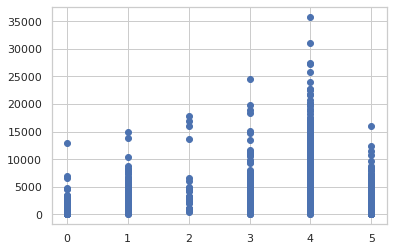

In [34]:
plt.scatter(x=data['Highest degree offered'],y=data['Admissions total'])
plt.show()

# Splitting the data in train and test

Splitting the dataset


In [0]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Using Standard scaler for Feature Scaling

In [0]:
sc=StandardScaler()
# scaler=sc.fit(xTrain)
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

<h1>Modeling- Selecting, triaining and optimizing</h1>


# SVM (with Linear, RBF and Poly kernel)

In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC  
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 50, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 50, 100]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(SVC(), tuned_parameters, cv=5, n_jobs=-1,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Development set: Best Parameters")
    print()
    print(model.best_params_)
    print()
    print("Development set grid score:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    
#     y_true, y_pred = y_test, clf.predict(X_test)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

# Tuning hyper-parameters for precision

Development set: Best Parameters

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Development set grid score:

0.496 (+/-0.002) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.496 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.293) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.496 (+/-0.002) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.698 (+/-0.227) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.496 (+/-0.002) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.496 (+/-0.002) for {'C': 0.01, 'degree': 1, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.01, 'degree': 2, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.01, 'degree': 3, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.01, 'degree': 4, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.01, 'degree': 5, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.1, 'degree': 1, 'kernel': 'poly'}
0.496 (+/-0.002) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.496 (+/-0.002) f

# KNNeighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'n_neighbors':[1,2,3,4,5]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Development set: Best Parameters")
    print()
    print(model.best_params_)
    print()
    print("Development set grid score:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

# Tuning hyper-parameters for precision

Development set: Best Parameters

{'n_neighbors': 1}

Development set grid score:

0.741 (+/-0.171) for {'n_neighbors': 1}
0.687 (+/-0.110) for {'n_neighbors': 2}
0.731 (+/-0.323) for {'n_neighbors': 3}
0.693 (+/-0.135) for {'n_neighbors': 4}
0.698 (+/-0.202) for {'n_neighbors': 5}

Detailed classification report:
0.9891540130151844
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       1.00      0.99      0.99       458

    accuracy                           0.99       461
   macro avg       0.69      0.99      0.77       461
weighted avg       1.00      0.99      0.99       461

[[  3   0]
 [  5 453]]

# Tuning hyper-parameters for recall

Development set: Best Parameters

{'n_neighbors': 2}

Development set grid score:

0.946 (+/-0.200) for {'n_neighbors': 1}
0.992 (+/-0.005) for {'n_neighbors': 2}
0.698 (+/-0.198) for {'n_neighbors': 3}
0.795 (+/-0.198) for {'n_neighbo

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'penalty':['l1', 'l2']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Development set: Best Parameters")
    print()
    print(model.best_params_)
    print()
    print("Development set grid scores:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

# Tuning hyper-parameters for precision

Development set: Best Parameters

{'penalty': 'l2'}

Development set grid scores:

nan (+/-nan) for {'penalty': 'l1'}
0.546 (+/-0.201) for {'penalty': 'l2'}

Detailed classification report:
0.9934924078091106
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00       458

    accuracy                           0.99       461
   macro avg       0.75      0.67      0.70       461
weighted avg       0.99      0.99      0.99       461

[[  1   2]
 [  1 457]]

# Tuning hyper-parameters for recall

Development set: Best Parameters

{'penalty': 'l2'}

Development set grid scores:

nan (+/-nan) for {'penalty': 'l1'}
0.548 (+/-0.200) for {'penalty': 'l2'}

Detailed classification report:
0.9934924078091106
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00

# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'max_depth':[10,12,13,14]}] 

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Development set: Best parameters")
    print()
    print(model.best_params_)
    print()
    print("Development set grid score:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

# Tuning hyper-parameters for precision

Development set: Best parameters

{'max_depth': 10}

Development set grid score:

0.950 (+/-0.200) for {'max_depth': 10}
0.950 (+/-0.200) for {'max_depth': 12}
0.883 (+/-0.291) for {'max_depth': 13}
0.850 (+/-0.267) for {'max_depth': 14}

Detailed classification report:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       458

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461

[[  3   0]
 [  0 458]]

# Tuning hyper-parameters for recall

Development set: Best parameters

{'max_depth': 10}

Development set grid score:

1.000 (+/-0.002) for {'max_depth': 10}
1.000 (+/-0.002) for {'max_depth': 12}
0.998 (+/-0.007) for {'max_depth': 13}
1.000 (+/-0.002) for {'max_depth': 14}

Detailed classification report:
0.9978308026030369
     

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

0.9978308026030369
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00       458

    accuracy                           1.00       461
   macro avg       0.88      1.00      0.93       461
weighted avg       1.00      1.00      1.00       461

[[  3   0]
 [  1 457]]



# SVM and KNN Classifier are considered as best model 